In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# Parámetros físicos del péndulo
L = 1.0  # Longitud del péndulo (m)
g = 9.81  # Aceleración gravitacional (m/s^2)
b = 0.5   # Coeficiente de amortiguamiento

# Parámetros de simulación
t_start = 0
t_end = 10
dt = 0.01
t = np.arange(t_start, t_end, dt)

# Condiciones iniciales [theta, theta_dot]
x0 = [np.pi/4, 0]  # 45 grados inicial

def pendulum_dynamics(state, t, L, g, b):
    """
    Ecuaciones diferenciales del péndulo
    state[0] = theta
    state[1] = theta_dot
    """
    theta, theta_dot = state
    
    # Ecuaciones del péndulo simple
    theta_ddot = -g/L * np.sin(theta) - b * theta_dot
    
    return [theta_dot, theta_ddot]

# Función para simular el péndulo con diferentes tipos de ruido
def simulate_pendulum(noise_type='none', process_std=0.1, measurement_std=0.1):
    # Simulación del sistema sin ruido
    solution = odeint(pendulum_dynamics, x0, t, args=(L, g, b))
    theta = solution[:, 0]
    theta_dot = solution[:, 1]
    
    if noise_type == 'none':
        return theta, theta_dot
    
    elif noise_type == 'process':
        # Añadir ruido de proceso (afecta a la dinámica)
        noisy_theta = np.zeros_like(theta)
        noisy_theta_dot = np.zeros_like(theta_dot)
        
        noisy_theta[0] = theta[0]
        noisy_theta_dot[0] = theta_dot[0]
        
        for i in range(1, len(t)):
            # Integrar con ruido de proceso
            state = [noisy_theta[i-1], noisy_theta_dot[i-1]]
            derivative = pendulum_dynamics(state, t[i-1], L, g, b)
            
            process_noise = np.random.normal(0, process_std, 2)
            
            noisy_theta[i] = noisy_theta[i-1] + (derivative[0] + process_noise[0]) * dt
            noisy_theta_dot[i] = noisy_theta_dot[i-1] + (derivative[1] + process_noise[1]) * dt
            
        return noisy_theta, noisy_theta_dot
    
    elif noise_type == 'measurement':
        # Añadir ruido de medición (afecta solo a la observación)
        measurement_noise_theta = np.random.normal(0, measurement_std, len(t))
        measurement_noise_theta_dot = np.random.normal(0, measurement_std, len(t))
        
        noisy_theta = theta + measurement_noise_theta
        noisy_theta_dot = theta_dot + measurement_noise_theta_dot
        
        return noisy_theta, noisy_theta_dot

# Simular los tres casos
theta_clean, theta_dot_clean = simulate_pendulum('none')
theta_process, theta_dot_process = simulate_pendulum('process', process_std=0.1)
theta_measurement, theta_dot_measurement = simulate_pendulum('measurement', measurement_std=0.1)



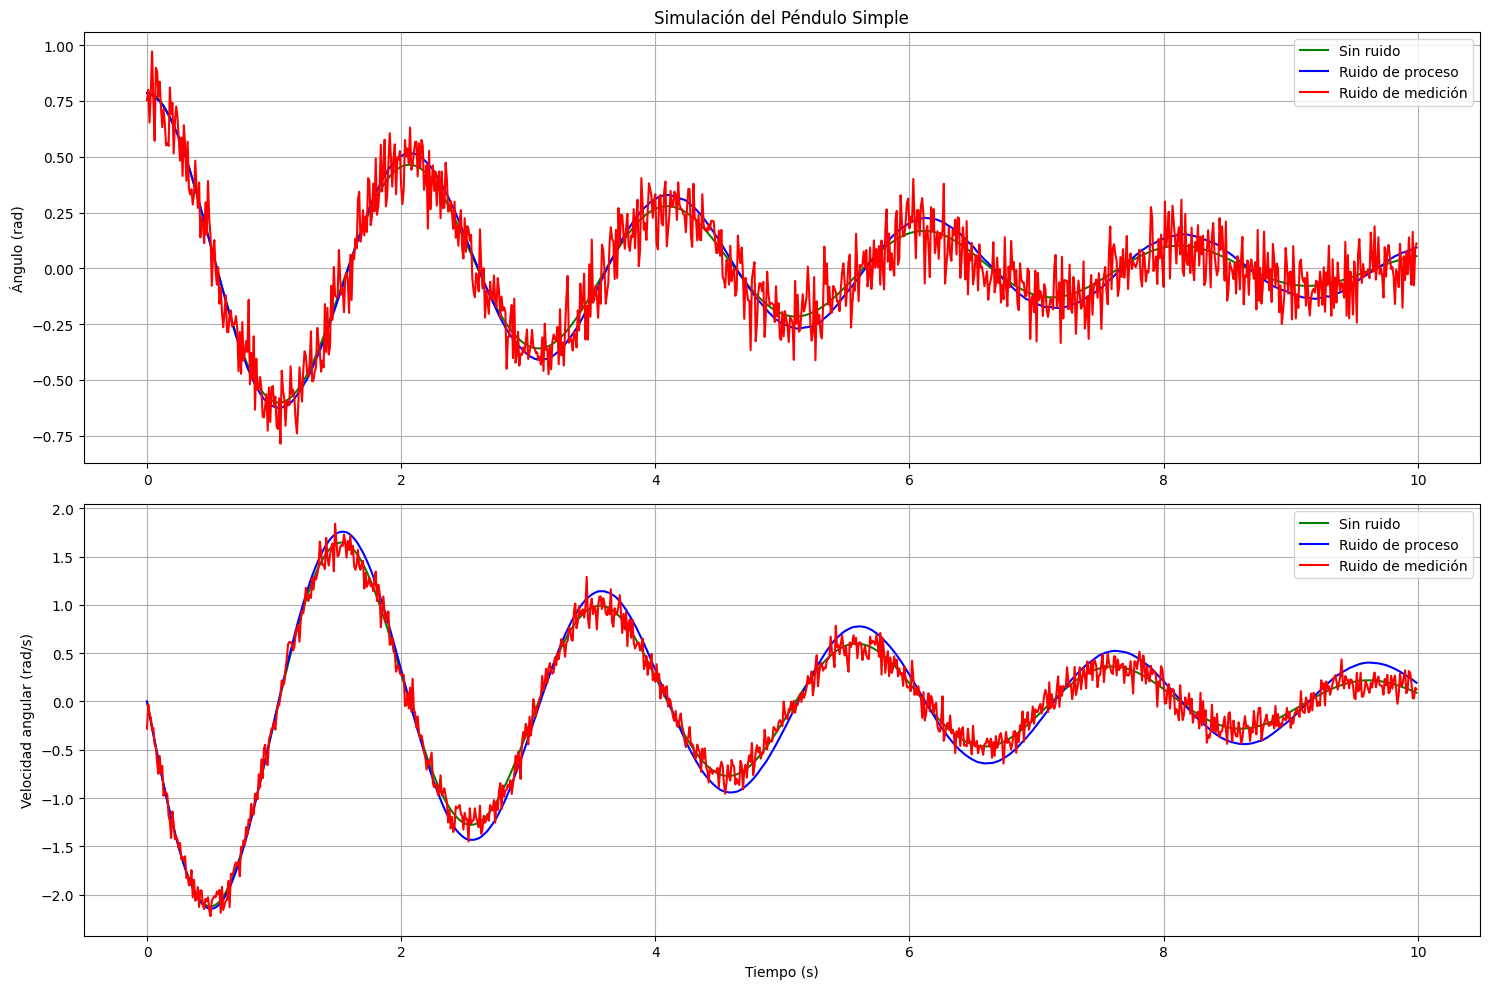

In [2]:
# Visualización de resultados
plt.figure(figsize=(15, 10))

# Posición angular
plt.subplot(2, 1, 1)
plt.plot(t, theta_clean, 'g-', label='Sin ruido')
plt.plot(t, theta_process, 'b-', label='Ruido de proceso')
plt.plot(t, theta_measurement, 'r-', label='Ruido de medición')
plt.grid(True)
plt.legend()
plt.ylabel('Ángulo (rad)')
plt.title('Simulación del Péndulo Simple')

# Velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, theta_dot_clean, 'g-', label='Sin ruido')
plt.plot(t, theta_dot_process, 'b-', label='Ruido de proceso')
plt.plot(t, theta_dot_measurement, 'r-', label='Ruido de medición')
plt.grid(True)
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos del péndulo
L = 1.0  # Longitud del péndulo (m)
g = 9.81  # Aceleración gravitacional (m/s^2)
b = 0.5   # Coeficiente de amortiguamiento

# Parámetros de simulación
t_start = 0
t_end = 10
dt = 0.001  # Paso de tiempo más pequeño para mejorar precisión de Euler
t = np.arange(t_start, t_end, dt)
n_steps = len(t)

# Condiciones iniciales
theta_0 = np.pi/4  # 45 grados
theta_dot_0 = 0    # Velocidad angular inicial

def pendulum_derivatives(theta, theta_dot):
    """
    Calcula las derivadas del péndulo
    """
    # theta_dot es la derivada de theta
    # theta_ddot es la derivada de theta_dot
    theta_ddot = -g/L * np.sin(theta) - b * theta_dot
    
    return theta_dot, theta_ddot

def simulate_pendulum_euler(noise_type='none', process_std=0.1, measurement_std=0.1):
    """
    Simula el péndulo usando el método de Euler con diferentes tipos de ruido
    """
    # Inicializar arrays para almacenar resultados
    theta = np.zeros(n_steps)
    theta_dot = np.zeros(n_steps)
    
    # Condiciones iniciales
    theta[0] = theta_0
    theta_dot[0] = theta_dot_0
    
    # Integración usando método de Euler
    for i in range(1, n_steps):
        # Obtener derivadas en el paso actual
        dtheta, dtheta_dot = pendulum_derivatives(theta[i-1], theta_dot[i-1])
        
        if noise_type == 'process':
            # Añadir ruido de proceso a las derivadas
            process_noise_theta = np.random.normal(0, process_std)
            process_noise_theta_dot = np.random.normal(0, process_std)
            dtheta += process_noise_theta
            dtheta_dot += process_noise_theta_dot
        
        # Método de Euler: y(t+dt) = y(t) + dy/dt * dt
        theta[i] = theta[i-1] + dtheta * dt
        theta_dot[i] = theta_dot[i-1] + dtheta_dot * dt
    
    if noise_type == 'measurement':
        # Añadir ruido de medición a las señales completas
        theta += np.random.normal(0, measurement_std, n_steps)
        theta_dot += np.random.normal(0, measurement_std, n_steps)
    
    return theta, theta_dot

# Simular los tres casos
theta_clean, theta_dot_clean = simulate_pendulum_euler('none')
theta_process, theta_dot_process = simulate_pendulum_euler('process', process_std=0.05)
theta_measurement, theta_dot_measurement = simulate_pendulum_euler('measurement', measurement_std=0.05)



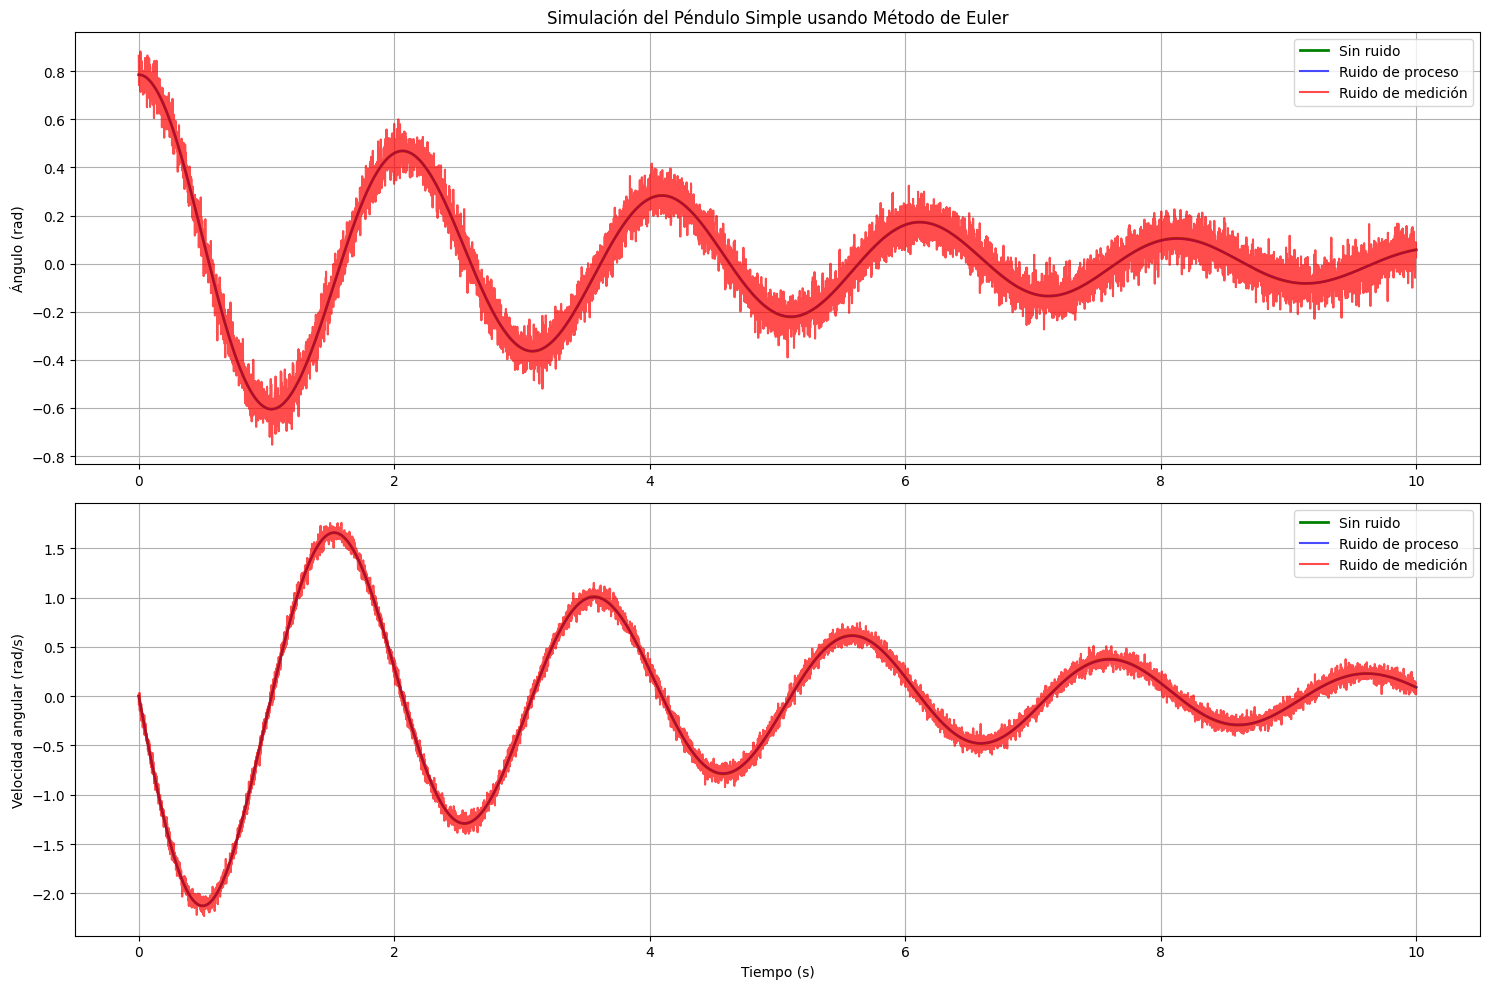

In [11]:
# Visualización de resultados
plt.figure(figsize=(15, 10))

# Posición angular
plt.subplot(2, 1, 1)
plt.plot(t, theta_clean, 'g-', label='Sin ruido', linewidth=2)
plt.plot(t, theta_process, 'b-', label='Ruido de proceso', alpha=0.7)
plt.plot(t, theta_measurement, 'r-', label='Ruido de medición', alpha=0.7)
plt.grid(True)
plt.legend()
plt.ylabel('Ángulo (rad)')
plt.title('Simulación del Péndulo Simple usando Método de Euler')

# Velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, theta_dot_clean, 'g-', label='Sin ruido', linewidth=2)
plt.plot(t, theta_dot_process, 'b-', label='Ruido de proceso', alpha=0.7)
plt.plot(t, theta_dot_measurement, 'r-', label='Ruido de medición', alpha=0.7)
plt.grid(True)
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')

plt.tight_layout()
plt.show()

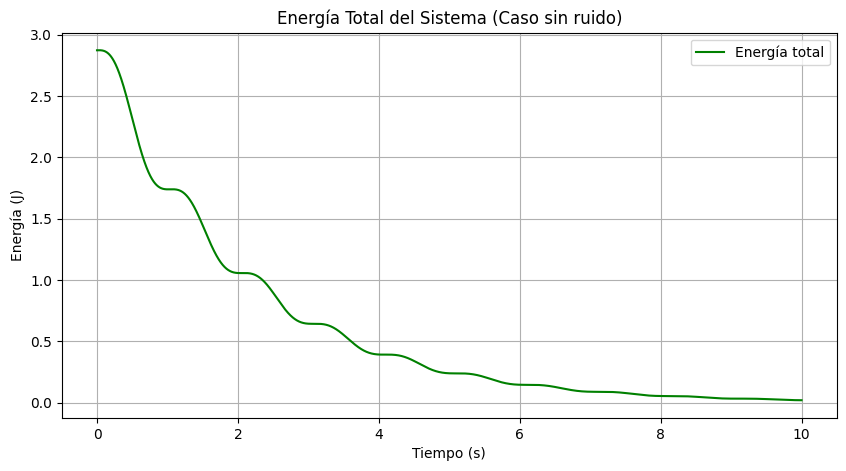

In [6]:
# Calcular energía del sistema
def calculate_energy(theta, theta_dot):
    """
    Calcula la energía total del péndulo (cinética + potencial)
    """
    kinetic = 0.5 * m * L**2 * theta_dot**2
    potential = m * g * L * (1 - np.cos(theta))
    return kinetic + potential

# Añadir gráfica de energía para el caso sin ruido
m = 1.0  # masa del péndulo (kg)
energy_clean = calculate_energy(theta_clean, theta_dot_clean)

plt.figure(figsize=(10, 5))
plt.plot(t, energy_clean, 'g-', label='Energía total')
plt.grid(True)
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.title('Energía Total del Sistema (Caso sin ruido)')
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos del péndulo
L = 1.0  # Longitud del péndulo (m)
g = 9.81  # Aceleración gravitacional (m/s^2)
b = 0.5   # Coeficiente de amortiguamiento

# Parámetros de simulación
t_start = 0
t_end = 10
dt = 0.01  # Podemos usar dt más grande que en Euler puro
t = np.arange(t_start, t_end, dt)
n_steps = len(t)

# Parámetros del filtro de partículas
n_particles = 100
process_std = 0.1
measurement_std = 0.1

def pendulum_derivatives(theta, theta_dot):
    """
    Calcula las derivadas del péndulo
    """
    theta_ddot = -g/L * np.sin(theta) - b * theta_dot
    return theta_dot, theta_ddot

def generate_true_trajectory():
    """
    Genera la trayectoria real del péndulo con ruido de proceso
    """
    theta = np.zeros(n_steps)
    theta_dot = np.zeros(n_steps)
    
    # Condiciones iniciales
    theta[0] = np.pi/4
    theta_dot[0] = 0
    
    # Simulación con Euler
    for i in range(1, n_steps):
        dtheta, dtheta_dot = pendulum_derivatives(theta[i-1], theta_dot[i-1])
        
        # Añadir ruido de proceso
        process_noise_theta = np.random.normal(0, process_std/2)
        process_noise_theta_dot = np.random.normal(0, process_std/2)
        
        theta[i] = theta[i-1] + (dtheta + process_noise_theta) * dt
        theta_dot[i] = theta_dot[i-1] + (dtheta_dot + process_noise_theta_dot) * dt
    
    return theta, theta_dot

def generate_measurements(theta_true, theta_dot_true):
    """
    Genera mediciones ruidosas
    """
    theta_measured = theta_true + np.random.normal(0, measurement_std, n_steps)
    theta_dot_measured = theta_dot_true + np.random.normal(0, measurement_std, n_steps)
    return theta_measured, theta_dot_measured

class ParticleFilter:
    def __init__(self, n_particles):
        self.n_particles = n_particles
        # Inicializar partículas
        self.particles_theta = np.random.normal(np.pi/4, 0.1, n_particles)
        self.particles_theta_dot = np.random.normal(0, 0.1, n_particles)
        self.weights = np.ones(n_particles) / n_particles
        
    def predict(self):
        """
        Propaga las partículas a través del modelo
        """
        for i in range(self.n_particles):
            dtheta, dtheta_dot = pendulum_derivatives(
                self.particles_theta[i], 
                self.particles_theta_dot[i]
            )
            
            # Añadir ruido de proceso
            process_noise_theta = np.random.normal(0, process_std)
            process_noise_theta_dot = np.random.normal(0, process_std)
            
            self.particles_theta[i] += (dtheta + process_noise_theta) * dt
            self.particles_theta_dot[i] += (dtheta_dot + process_noise_theta_dot) * dt
    
    def update(self, measurement_theta, measurement_theta_dot):
        """
        Actualiza los pesos basado en las mediciones
        """
        for i in range(self.n_particles):
            # Calcular probabilidad de la medición dado el estado
            prob_theta = np.exp(-0.5 * ((self.particles_theta[i] - measurement_theta) / measurement_std)**2)
            prob_theta_dot = np.exp(-0.5 * ((self.particles_theta_dot[i] - measurement_theta_dot) / measurement_std)**2)
            
            self.weights[i] *= prob_theta * prob_theta_dot
        
        # Normalizar pesos
        self.weights += 1e-300  # Evitar división por cero
        self.weights /= sum(self.weights)
    
    def resample(self):
        """
        Remuestreo sistemático
        """
        cumsum = np.cumsum(self.weights)
        cumsum[-1] = 1.0  # Evitar error de redondeo
        
        # Generar puntos de muestreo
        positions = (np.random.random() + np.arange(self.n_particles)) / self.n_particles
        
        # Remuestrear partículas
        indexes = np.searchsorted(cumsum, positions)
        
        # Actualizar partículas
        self.particles_theta = self.particles_theta[indexes]
        self.particles_theta_dot = self.particles_theta_dot[indexes]
        
        # Resetear pesos
        self.weights = np.ones(self.n_particles) / self.n_particles
    
    def estimate(self):
        """
        Calcula la estimación del estado
        """
        theta_est = np.sum(self.weights * self.particles_theta)
        theta_dot_est = np.sum(self.weights * self.particles_theta_dot)
        return theta_est, theta_dot_est

# Generar trayectoria real y mediciones
theta_true, theta_dot_true = generate_true_trajectory()
theta_measured, theta_dot_measured = generate_measurements(theta_true, theta_dot_true)

# Inicializar filtro de partículas
pf = ParticleFilter(n_particles)

# Arrays para almacenar estimaciones
theta_estimated = np.zeros(n_steps)
theta_dot_estimated = np.zeros(n_steps)

# Ejecutar filtro de partículas
for t in range(n_steps):
    pf.predict()
    pf.update(theta_measured[t], theta_dot_measured[t])
    theta_estimated[t], theta_dot_estimated[t] = pf.estimate()
    
    if t % 10 == 0:  # Remuestrear cada 10 pasos
        pf.resample()



In [18]:
t = range(n_steps)

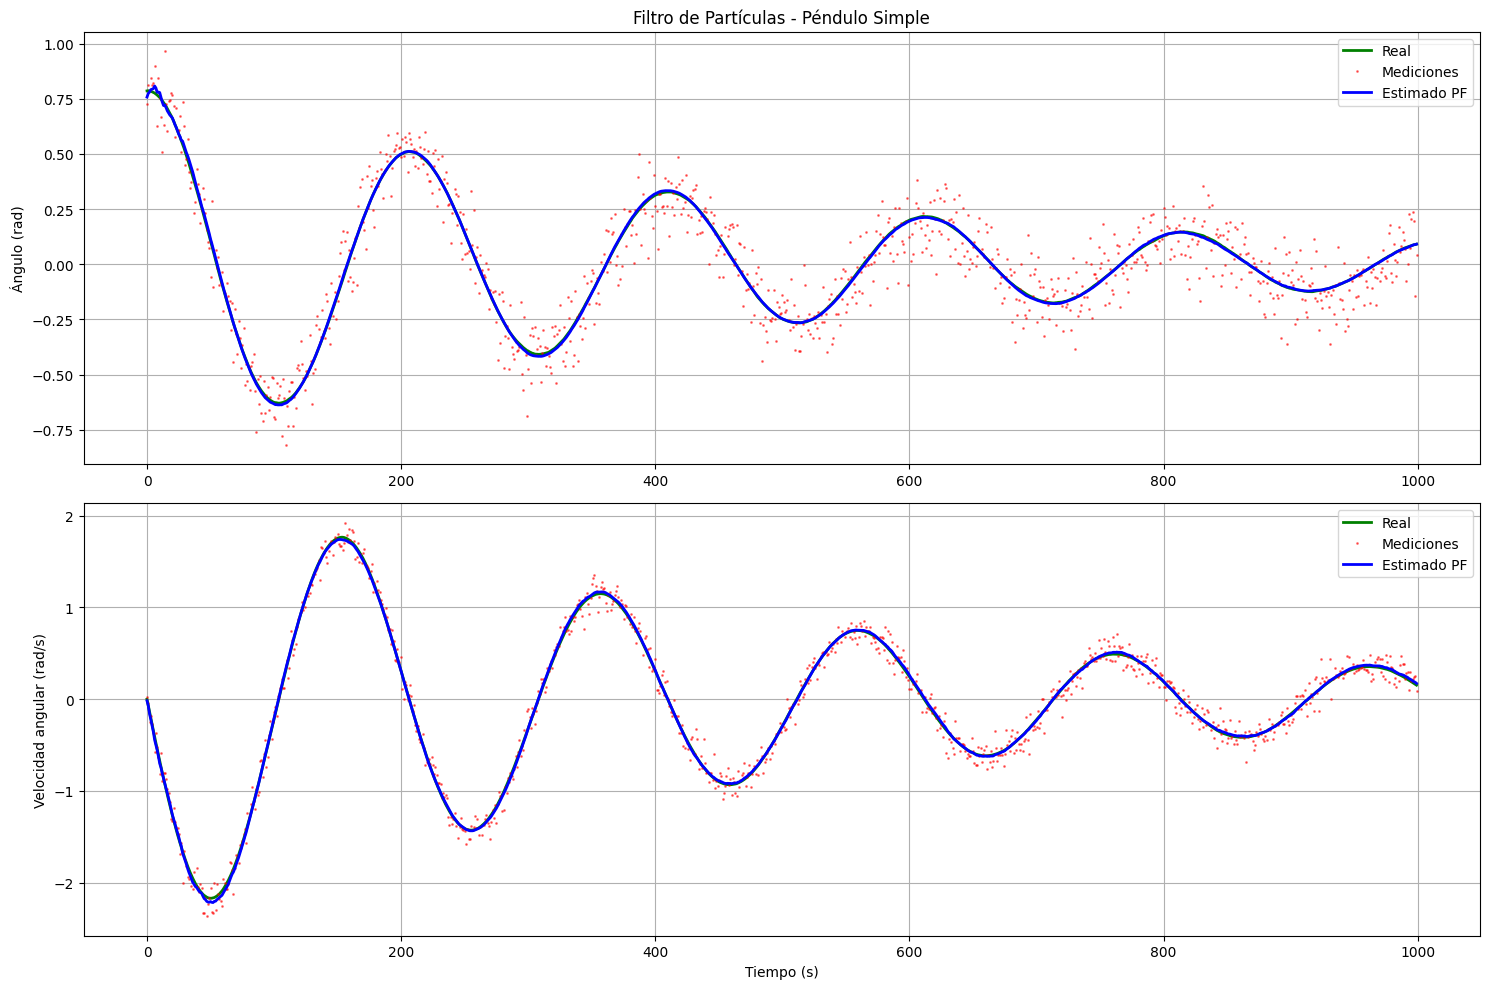

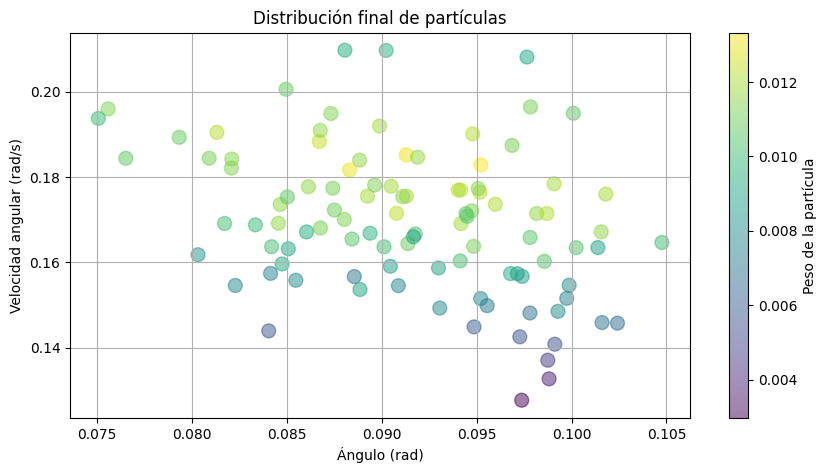

In [19]:
# Visualización de resultados
plt.figure(figsize=(15, 10))

# Posición angular
plt.subplot(2, 1, 1)
plt.plot(t, theta_true, 'g-', label='Real', linewidth=2)
plt.plot(t, theta_measured, 'r.', label='Mediciones', alpha=0.5, markersize=2)
plt.plot(t, theta_estimated, 'b-', label='Estimado PF', linewidth=2)
plt.grid(True)
plt.legend()
plt.ylabel('Ángulo (rad)')
plt.title('Filtro de Partículas - Péndulo Simple')

# Velocidad angular
plt.subplot(2, 1, 2)
plt.plot(t, theta_dot_true, 'g-', label='Real', linewidth=2)
plt.plot(t, theta_dot_measured, 'r.', label='Mediciones', alpha=0.5, markersize=2)
plt.plot(t, theta_dot_estimated, 'b-', label='Estimado PF', linewidth=2)
plt.grid(True)
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')

plt.tight_layout()
plt.show()

# Visualizar distribución de partículas en el último paso
plt.figure(figsize=(10, 5))
plt.scatter(pf.particles_theta, pf.particles_theta_dot, c=pf.weights, 
           cmap='viridis', alpha=0.5, s=100)
plt.colorbar(label='Peso de la partícula')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Distribución final de partículas')
plt.grid(True)
plt.show()

In [ ]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go

In [30]:
len(t), theta_true.shape

(1000, (1000,))

In [31]:
# Crear subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=('Filtro de Partículas - Péndulo Simple', 'Distribución final de partículas'))

# Convertir t a lista
t_list = list(t)

# Posición angular
fig.add_trace(go.Scatter(x=t_list, y=theta_true, mode='lines', name='Real', line=dict(color='green', width=2)), row=1, col=1)
fig.add_trace(go.Scatter(x=t_list, y=theta_measured, mode='markers', name='Mediciones', marker=dict(color='red', size=2, opacity=0.5)), row=1, col=1)
fig.add_trace(go.Scatter(x=t_list, y=theta_estimated, mode='lines', name='Estimado PF', line=dict(color='blue', width=2)), row=1, col=1)

# Velocidad angular
fig.add_trace(go.Scatter(x=t_list, y=theta_dot_true, mode='lines', name='Real', line=dict(color='green', width=2)), row=2, col=1)
fig.add_trace(go.Scatter(x=t_list, y=theta_dot_measured, mode='markers', name='Mediciones', marker=dict(color='red', size=2, opacity=0.5)), row=2, col=1)
fig.add_trace(go.Scatter(x=t_list, y=theta_dot_estimated, mode='lines', name='Estimado PF', line=dict(color='blue', width=2)), row=2, col=1)

# Actualizar layout
fig.update_layout(height=800, width=1000, title_text='Filtro de Partículas - Péndulo Simple')
fig.update_xaxes(title_text='Tiempo (s)', row=2, col=1)
fig.update_yaxes(title_text='Ángulo (rad)', row=1, col=1)
fig.update_yaxes(title_text='Velocidad angular (rad/s)', row=2, col=1)

fig.show()

# Visualizar distribución de partículas en el último paso
fig_particles = go.Figure()

fig_particles.add_trace(go.Scatter(
    x=pf.particles_theta, 
    y=pf.particles_theta_dot, 
    mode='markers', 
    marker=dict(size=10, color=pf.weights, colorscale='Viridis', showscale=True),
    text=pf.weights,
    name='Partículas'
))

fig_particles.update_layout(
    title='Distribución final de partículas',
    xaxis_title='Ángulo (rad)',
    yaxis_title='Velocidad angular (rad/s)',
    height=600,
    width=800
)

fig_particles.show()

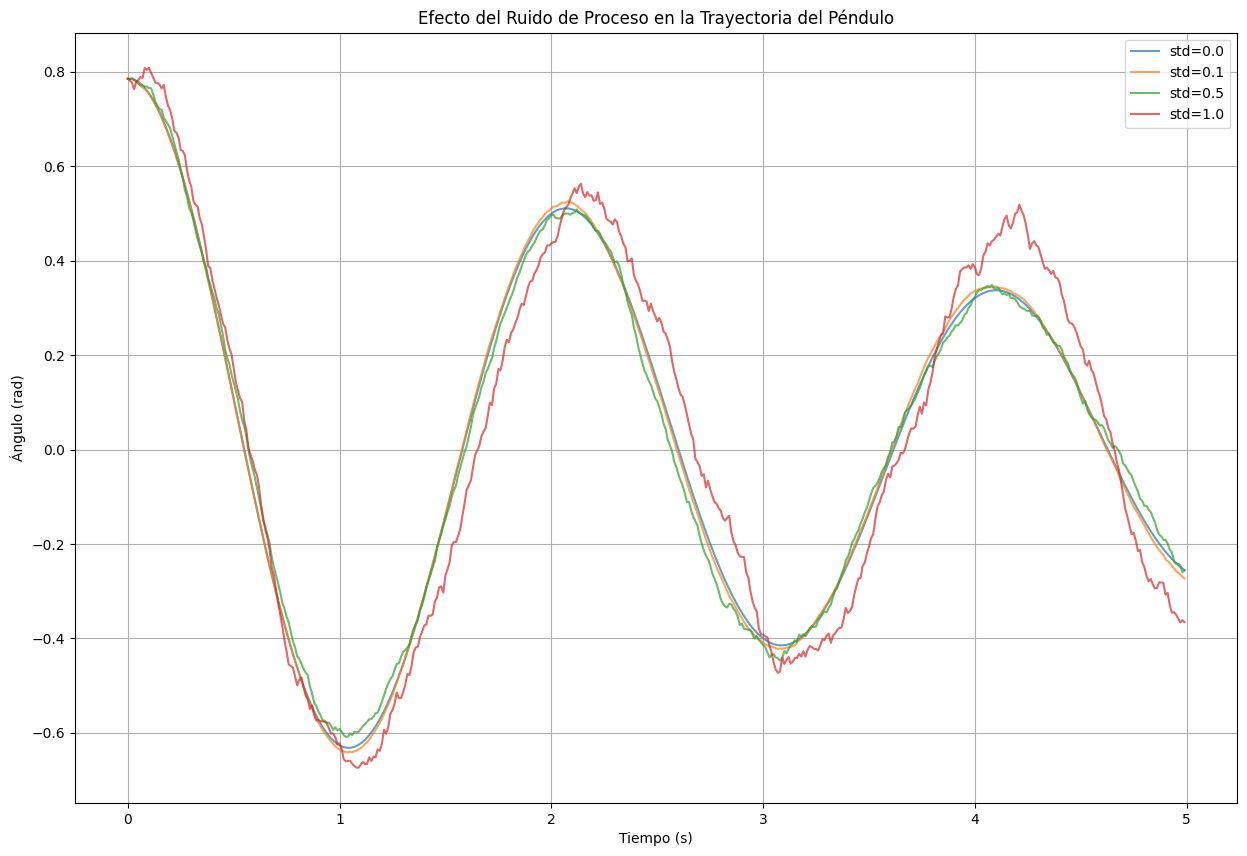

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
dt = 0.01
t = np.arange(0, 5, dt)
process_std_values = [0.0, 0.1, 0.5, 1.0]

def simulate_with_process_noise(process_std):
    theta = np.zeros_like(t)
    theta_dot = np.zeros_like(t)
    
    # Condiciones iniciales
    theta[0] = np.pi/4
    theta_dot[0] = 0
    
    for i in range(1, len(t)):
        dtheta, dtheta_dot = pendulum_derivatives(theta[i-1], theta_dot[i-1])
        
        process_noise_theta = np.random.normal(0, process_std)
        process_noise_theta_dot = np.random.normal(0, process_std)
        
        theta[i] = theta[i-1] + (dtheta + process_noise_theta) * dt
        theta_dot[i] = theta_dot[i-1] + (dtheta_dot + process_noise_theta_dot) * dt
        
    return theta, theta_dot

# Graficar diferentes niveles de ruido
plt.figure(figsize=(15, 10))

for std in process_std_values:
    theta, _ = simulate_with_process_noise(std)
    plt.plot(t, theta, label=f'std={std}', alpha=0.7)

plt.grid(True)
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Efecto del Ruido de Proceso en la Trayectoria del Péndulo')
plt.show()